In [2]:
! nvidia-smi

Thu Oct 10 13:20:43 2019       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 418.56       Driver Version: 418.56       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  GeForce GTX 1060    Off  | 00000000:01:00.0 Off |                  N/A |
| N/A   44C    P2    23W /  N/A |    486MiB /  6078MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [3]:
import cudf

gdf = cudf.DataFrame({'test':[1,2,3]})
print(gdf)
print(gdf.describe())

   test
0     1
1     2
2     3
       test
count   3.0
mean    2.0
std     1.0
min     1.0
25%     1.5
50%     2.0
75%     2.5
max     3.0


In [4]:
from blazingsql import BlazingContext

In [5]:
bc = BlazingContext()

connection established


In [6]:
bc.create_table('foo', gdf)

In [7]:
# Query
result = bc.sql('SELECT * FROM foo ORDER BY test DESC').get()
result_gdf = result.columns

#Print GDF
print(result_gdf)

   test
0     3
1     2
2     1


In [21]:
import os

data_path = os.getcwd() +'/data/'

In [22]:
bc.create_table('beer', data_path + 'beer_small.csv')

In [23]:
result = bc.sql("SELECT * FROM beer WHERE brewery_name = 'Sunday River Brewing Co.'").get()
result_gdf = result.columns
result_gdf

,Unnamed: 0,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
0,213563,1922,Sunday River Brewing Co.,1202595455,3.5,3.0,4.0,smcolw,Dortmunder / Export Lager,4.0,3.0,Sunday River Lager,null,21923
1,213532,1922,Sunday River Brewing Co.,1187653634,4.0,3.5,3.5,BuckSpin,American Blonde Ale,3.5,3.5,Sunsplash Golden Ale,4.5,33001
2,213545,1922,Sunday River Brewing Co.,1172457299,2.5,3.5,4.0,BuckSpin,American Porter,2.5,2.5,Black Bear Porter,null,21924
3,213578,1922,Sunday River Brewing Co.,1233449031,3.5,3.5,3.5,thekevlarkid,Foreign / Export Stout,3.5,3.0,Jamaican Stout,8.0,32284


In [12]:
result = bc.sql("SELECT * FROM beer WHERE beer_style='Belgian IPA' AND review_overall > 4.5 ORDER BY brewery_name").get()
result.columns

,Unnamed: 0,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
0,1395906,13837,Ale Asylum,1273368858,5.0,4.0,4.0,Lukafer,Belgian IPA,4.0,4.5,Bedlam,7.5,57290
1,1220708,4,Allagash Brewing Company,1242100571,5.0,4.5,4.5,Chodite,Belgian IPA,5.0,5.0,Allagash Hugh Malone,8.5,36527
2,785229,24903,Anchorage Brewing Company,1319593938,5.0,5.0,4.0,tavernjef,Belgian IPA,4.5,5.0,Bitter Monk,9.0,72465
3,165271,610,Bear Republic Brewing Co.,1253225458,5.0,4.5,4.5,david18,Belgian IPA,4.5,4.5,Crazy Ivan,6.9,42412
4,169586,610,Bear Republic Brewing Co.,1293057461,5.0,5.0,4.5,CliffBrake,Belgian IPA,4.5,4.5,Ryevalry,8.2,58144
5,1506229,321,Brasserie d'Achouffe,1208888165,5.0,5.0,4.5,bgreene14,Belgian IPA,4.0,5.0,Houblon Chouffe Dobbelen IPA Tripel,9.0,27804
6,1506406,321,Brasserie d'Achouffe,1173915399,5.0,4.5,5.0,IgnatiusReilly,Belgian IPA,4.5,4.5,Houblon Chouffe Dobbelen IPA Tripel,9.0,27804
7,1506339,321,Brasserie d'Achouffe,1186712722,5.0,4.5,4.5,VonSteinhoist,Belgian IPA,5.0,5.0,Houblon Chouffe Dobbelen IPA Tripel,9.0,27804
8,1506383,321,Brasserie d'Achouffe,1179196460,5.0,4.0,4.5,BretSikkink,Belgian IPA,4.0,4.5,Houblon Chouffe Dobbelen IPA Tripel,9.0,27804
9,1505702,321,Brasserie d'Achouffe,1298068929,5.0,5.0,4.5,smakawhat,Belgian IPA,4.5,5.0,Houblon Chouffe Dobbelen IPA Tripel,9.0,27804


In [13]:
result = bc.sql("SELECT brewery_name, count(*) AS number FROM beer WHERE beer_style='Belgian IPA' AND review_overall > 4.5 GROUP BY brewery_name ORDER BY number DESC").get()
result.columns

,brewery_name,number
0,Brasserie d'Achouffe,14
1,Flying Dog Brewery,5
2,Brouwerij Van Steenberge N.V.,4
3,De Leyerth Brouwerijen (Urthel),4
4,Stone Brewing Co.,4
5,Brouwerij Het Anker,4
6,Brouwerij Duvel Moortgat NV,3
7,Tröegs Brewing Company,2
8,Bear Republic Brewing Co.,2
9,Brouwerij Van Eecke N.V.,2


In [14]:
import pandas as pd

pdf = result.columns.to_pandas()

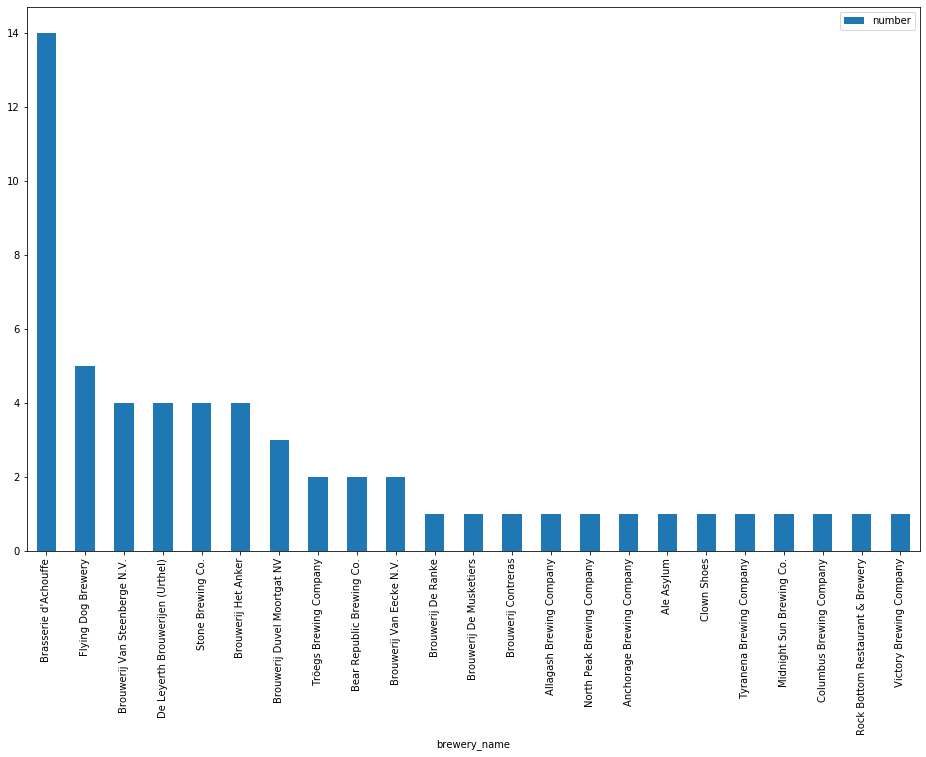

In [26]:
pdf.plot.bar('brewery_name', 'number', figsize=(16,10))